In [353]:
import torch
import torch.nn as nn               # neural network library
import torch.nn.functional as F     
import numpy as np
#from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

### The tensor is a multi dimensional matrix with elements of a Single data type

Like a numpy array but works better on GPU 

# Lists

In [354]:
list = [[1,2,6,78,123,4],[1,2,3]]
list

# multi dimension and different kinds of data on a list

[[1, 2, 6, 78, 123, 4], [1, 2, 3]]

# Numpy Arrays

In [355]:
np1 = np.random.rand(3,4) # 3 lines 4 columns
np1

# Same kind of type on every element
# Deals better with math

array([[0.48848663, 0.16868423, 0.83214965, 0.11798017],
       [0.0244177 , 0.52159798, 0.02489132, 0.41009316],
       [0.1008455 , 0.1211039 , 0.47633127, 0.98581598]])

In [356]:
np1.dtype

dtype('float64')

# Tensors

In [357]:
tensor = torch.randn(3,4) # 3 lines and 4 columns of random data
tensor

tensor([[-1.0504, -2.1112, -1.6784, -1.0515],
        [ 0.1677, -1.3358,  0.3738, -0.7649],
        [-0.0159,  1.3998,  0.3221,  0.2055]])

In [358]:
# From numpy

new_tensor = torch.tensor(np1)
new_tensor.dtype

torch.float64

# Operations

In [359]:
my_torch = torch.arange(10)
my_torch

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [360]:
# reshape and view
reshape = my_torch.reshape(2,5)
reshape

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [361]:
# If i don't know the number of items

my_torch2 = torch.arange(15)
my_torch2

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [362]:
reshape2 = my_torch2.reshape(3,-1)
reshape2

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]])

In [363]:
my_torch3 = torch.arange(10)
my_torch3

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [364]:
my_torch4 = my_torch3.view(2,5)
my_torch4

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [365]:
# They will update
my_torch5 = torch.arange(10)
my_torch5

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [366]:
my_torch6 = my_torch5.reshape(2,5)
my_torch6

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [367]:
my_torch5[3] = 100
my_torch5

tensor([  0,   1,   2, 100,   4,   5,   6,   7,   8,   9])

In [368]:
my_torch6
# It was updated !!!

tensor([[  0,   1,   2, 100,   4],
        [  5,   6,   7,   8,   9]])

In [369]:
# Slices
my_torch7 = torch.arange(10)
my_torch7

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [370]:
my_torch7[3:]

tensor([3, 4, 5, 6, 7, 8, 9])

# Math

In [371]:
tensor_a = torch.tensor([1,3,4,4,5])
tensor_b = torch.tensor([1,0,-1,3,4])

In [372]:
# Add and subtraction
sum = tensor_a + tensor_b
sub = tensor_a - tensor_b

print(f"Sum {sum} and sub {sub}")

Sum tensor([2, 3, 3, 7, 9]) and sub tensor([0, 3, 5, 1, 1])


In [373]:
# Add longhand -> I can call a function
sum = torch.add(tensor_a,tensor_b)
sub = torch.sub(tensor_a,tensor_b)
print(f"Sum {sum} and sub {sub}")

Sum tensor([2, 3, 3, 7, 9]) and sub tensor([0, 3, 5, 1, 1])


In [374]:
# Multiplication
tensor_a*tensor_b
# or just torch.mul(tensor_a,tensor_b)

tensor([ 1,  0, -4, 12, 20])

In [375]:
# Division
tensor_a/tensor_b 
# convert to a float 
# And since there is a zero , the value explode to inf

# i could also make torch.div(tensor_a,tensor_b)

tensor([ 1.0000,     inf, -4.0000,  1.3333,  1.2500])

In [376]:
# Remainder Modulus
tensor_b % tensor_a

# Remainder longhand could be
# torch.remainder(tensor_b,tensor_a)

tensor([0, 0, 3, 3, 4])

In [377]:
# Exponents

torch.pow(tensor_a,tensor_b)
# could also make tensor_a**tensor_b

tensor([  1,   1,   0,  64, 625])

In [378]:
# i can also call like this
tensor_a.add(tensor_b)

tensor([2, 3, 3, 7, 9])

In [379]:
# Reassignment
#tensor_a = tensor_a + tensor_b 

tensor_a.add_(tensor_b)

tensor([2, 3, 3, 7, 9])

In [380]:
tensor_a

tensor([2, 3, 3, 7, 9])

# Neural Network

### Considering the flower dataset (iris)

'''
The columns in this dataset are:

Id

SepalLengthCm

SepalWidthCm

PetalLengthCm

PetalWidthCm

Species
'''

### 3 classes so the output could be 3

In [381]:
# Create model class to inhereit the nn module

#import torch 
#import torch.nn as nn
#import torch.nn.functional as F

class Model(nn.Module):
    # Input layer (4 features of the lowers) 
    # Hidden layer1 (number of neurons) 
    # Hidden Layer 2 (n)
    # Output(3 classes of iris flowers)

    def __init__(self,in_features=4, h1=8 , h2=10, out_features=3):
        super().__init__() # instantiate the nn.Module
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
    
    def forward(self,x):
        # X is an unity that belongs to the NN
        # push from the first, second and output layer
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x



In [382]:
# Seed for randomization
torch.manual_seed(41)
#creating an instance

model = Model()

In [383]:
# Loading the data

url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)

In [384]:
df.head()

# Change the species to numbers

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [385]:
encoder = OneHotEncoder(sparse_output = False)
species_encoded = encoder.fit_transform(df[['species']])

In [386]:
encoded = pd.DataFrame(species_encoded, columns = encoder.get_feature_names_out(['species']))
encoded

,species_setosa,species_versicolor,species_virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
145,0.0,0.0,1.0
146,0.0,0.0,1.0
147,0.0,0.0,1.0
148,0.0,0.0,1.0


In [387]:
# Add the onehotcode on original df
df.drop('species', axis=1, inplace = True)
encoded_df = pd.concat([df,encoded], axis =1)

In [388]:
encoded_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0


In [389]:
# Train test split   X,y
X = encoded_df.drop(columns = encoder.get_feature_names_out(['species']))
y = encoded_df[encoder.get_feature_names_out(['species'])]

In [390]:
X.head() #features

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [391]:
y.head() #goal

,species_setosa,species_versicolor,species_virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [392]:
# but we do not work with a dataframe.

X = X.values
y = y.values

In [393]:
# now we can separate into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state = 41)

In [394]:
# now transform the numpy to tensors
# All the features
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# Convert y labels
y_train = torch.FloatTensor(y_train)   #64 bits
y_test  = torch.FloatTensor(y_test)

In [395]:
# How to measure the error
# since this is a class problem : cross entropy

cross_loss = nn.CrossEntropyLoss()

# Choose optimizer (ADAM) and learning rate
# iterations (epochs)

# Model parameters are the layer 1,2 and output layer

#epoch goes to : Hidden layer 1 -> Hidden Layer 2 -> Output Layer
optimizer = torch.optim.SGD(model.parameters(), lr= 0.01)

model.parameters



<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=3, bias=True)
)>

In [401]:
# Train the model with epochs -> Run all the training data in the network
# i will make this 500 times
epochs = 500
epoch_losses = []

for i in range(epochs): #so 500 times
    # Forward and get prediction and measure mistake and add to losses

    y_pred = model.forward(X_train) # get predicted results and then compare

    # measure the loss for every epoch
    loss = cross_loss(y_pred,y_train)
    epoch_losses.append(loss.detach().numpy())              # detach to make it a numpy to graph


    # print every 100 epochs

    if i%100 ==0:
        print(f'Epoch: {i} and loss: {loss}')

    # then optimize with backpropagation -> take the error rate of forward and feed it back to fine tune the weights

    optimizer.zero_grad() # zero the initial gradient
    loss.backward()
    optimizer.step()



Epoch: 0 and loss: 0.06416051089763641
Epoch: 100 and loss: 0.060823362320661545
Epoch: 200 and loss: 0.057946834713220596
Epoch: 300 and loss: 0.055436599999666214
Epoch: 400 and loss: 0.0532224103808403


Text(0.5, 0, 'Epoch')

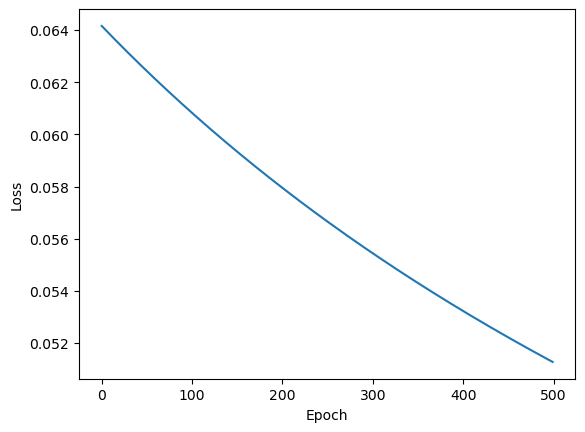

In [405]:
# Time to graph

plt.plot(range(epochs),epoch_losses)
plt.ylabel("Loss")
plt.xlabel('Epoch')


In [408]:
# Validate the test on TEST DATASET

# i do not need backprograpagation now

with torch.no_grad():
    # Test passes the model , without the backpropagation
    # y_evaluation will be predictions of the test_set
    y_evaluation = model.forward(X_test)  
    loss =  cross_loss(y_test,y_evaluation) # find the loss

In [410]:
loss

# Loss of test and training should be close , but it is not at all

tensor(-4.2804)

### I need to double check this 

In [413]:
correct = 0 # how many i got right

with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)

        # iris type ( Class ) the network thinks
        print(f'{i+1}.) {str(y_val)} \t {y_test[i]}' )

        if y_val.argmax().item() == y_test[i] : correct +=1

print(f'We have got corrected {correct}')

# We have 3 different classes of flowers 
# Highest number -> Highest prob  ( but it has to pass through softmax)

1.) tensor([-7.5837,  3.3255,  6.5707]) 	 tensor([0., 0., 1.])


RuntimeError: Boolean value of Tensor with more than one value is ambiguous